In [ ]:
#######################################
# Topic: "Human Factors"
#######################################
%reset

In [1]:
#############
# LIBRARIES
#############

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import colorlover as cl
from IPython.display import HTML

# Matplot lib style settings
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['text.color'] = '#424242'
plt.rcParams['lines.color'] = '#FFFFFF'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['patch.edgecolor'] = 'white' 
plt.rcParams['axes.edgecolor'] = '#f1f1f1' 
plt.rcParams['xtick.color'] = '#7f7f7f' 
plt.rcParams['ytick.color'] = '#7f7f7f' 
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.framealpha'] = None
plt.rcParams['legend.edgecolor'] = '#FFFFFF'
plt.rcParams['font.family'] = 'monospace'

In [2]:
#############
# LOAD DATA
#############

# Article counts per year downloaded from WoS 
HCI_CS = pd.read_csv('./data/HumanFactors_areaCS.txt', sep="	", header=0)
HCI_Eng = pd.read_csv('./data/HumanFactors_areaEngineer.txt', sep="	", header=0) 
HCI_Psy = pd.read_csv('./data/HumanFactors_areaPsych.txt', sep="	", header=0) 
HCI = pd.read_csv('./data/HumanFactors_allYears.txt', sep="	",  header=0) 

# Category data 
HCI_Cat = pd.read_csv('./data/HumanFactors_allAreas.txt', sep="	",  header=0) 

In [11]:
#############
# FORMAT DATA
#############

# Drop NaN values
HCI_CS = HCI_CS.dropna()
HCI_Eng = HCI_Eng.dropna()
HCI_Psy = HCI_Psy.dropna()
HCI_Cat = HCI_Cat.dropna()
HCI = HCI.dropna()

# The year column is in string format, convert it to a number
HCI["Publication Years"] = pd.to_numeric(HCI['﻿Publication Years'], errors='coerce')
HCI_CS["Publication Years"] = pd.to_numeric(HCI_CS['﻿Publication Years'], errors='coerce')
HCI_Eng["Publication Years"] = pd.to_numeric(HCI_Eng['﻿Publication Years'], errors='coerce')
HCI_Psy["Publication Years"] = pd.to_numeric(HCI_Psy['﻿Publication Years'], errors='coerce')

# Sort by year
nHCI_CS = HCI_CS.sort_values("Publication Years")
nHCI_Eng = HCI_Eng.sort_values("Publication Years")
nHCI_Psy = HCI_Psy.sort_values("Publication Years")
nHCI = HCI.sort_values("Publication Years")# matplot lib pie chart

# dataframes for plots
X = nHCI["Publication Years"]
X2 = nHCI_CS["Publication Years"]
X3 = nHCI_Eng["Publication Years"]
X4 = nHCI_Psy["Publication Years"]

Y1 = nHCI["records"]
Y2 = nHCI_CS["records"]
Y3 = nHCI_Eng["records"]
Y4 = nHCI_Psy["records"]

# Convert data into proportions for stacked charts
traces = [Y2,Y3,Y4]
newdf = pd.DataFrame(traces)
new = newdf.transpose()
new.columns = ['CS', 'Eng', 'Psy']
neword = pd.DataFrame(data=X.sort_values(ascending=False))
newind = neword.reset_index(drop=True)
new['Date'] = newind
new = new.dropna()

# Group by year to generate totals
dfg = new.groupby(by=['Date'], axis=0, level=None, as_index=True).sum()
dfg = dfg.fillna(value=0)

# Generate totals and proportions
dfg['Total'] = dfg.blocks['float64'].sum(1)  
dfg['p_CS'] = dfg['CS']/dfg['Total'] 
dfg['p_Eng'] = dfg['Eng']/dfg['Total'] 
dfg['p_Psy'] = dfg['Psy']/dfg['Total'] 
dfg = dfg.dropna(inplace=False)

In [12]:
#############
# COLORS
#############

cols = pd.read_csv('./data/ral_standard.csv', header=0)
allhex = cols[' HEX']
# Set color values
lg = len(HCI_Cat)
st = 15

In [13]:
#############
# CHARTS
#############
labels = HCI_Cat['﻿Research Areas']
values = HCI_Cat["records"]
#cols
lg
zlist = [""] * len(HCI_Cat)
zeros = pd.Series(zlist)
copy = zeros.copy()

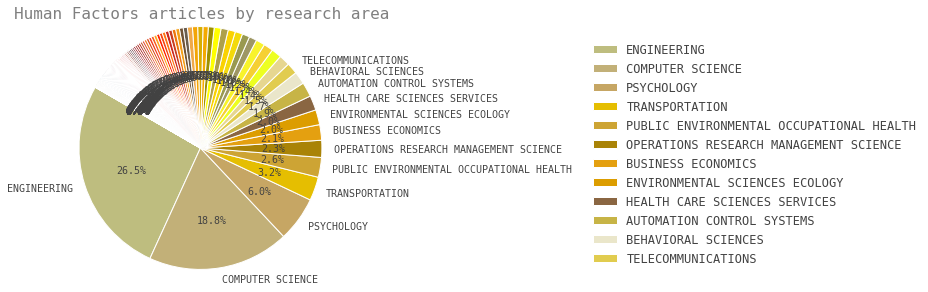

In [63]:
# Create a pie chart
copy[0:12] = labels[0:12] # only show top 12 labels
cols = allhex[:]

plt.pie(
    # using data total)arrests
    values,
    # with the labels being officer names
    labels=copy,
    # with no shadows
    shadow=False,
    # with colors
    colors=cols,
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=-210,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

plt.legend(bbox_to_anchor=(1.51, 1), loc=2, borderaxespad=1,frameon=False)
plt.title('Human Factors articles by research area', fontsize=16, fontweight='light', loc="left",verticalalignment="bottom", color="#7f7f7f")

# View the plot
plt.tight_layout()
plt.savefig('./images/HumanFactors_piechart.png', bbox_inches='tight')
plt.show()



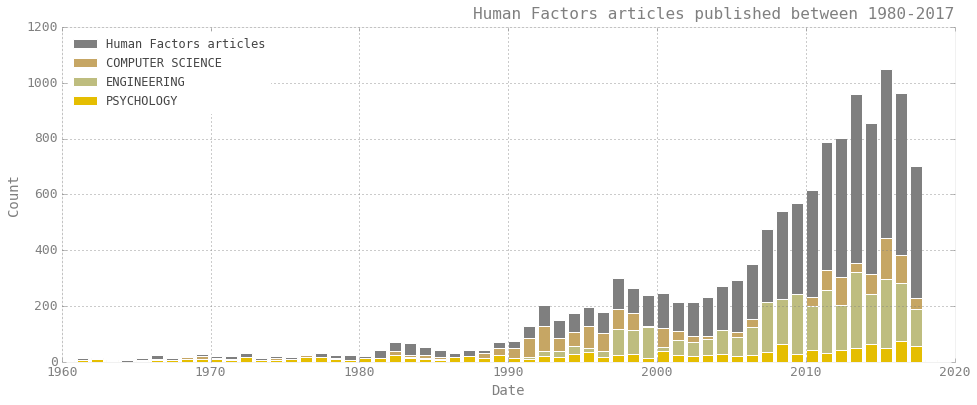

In [59]:
# Draw plot
plt.figure(figsize=(16,6))

plt.grid(color="#7f7f7f", linewidth=.8)
plt.bar(X,Y1,color="#7F7F7F",alpha=1, label='Human Factors articles')
plt.bar(X3,Y3,color=allhex[2], alpha=1, label=labels[1])
plt.bar(X2,Y2,color=allhex[0], alpha=1, label=labels[0])
plt.bar(X4,Y4,color=allhex[3], alpha=1, label=labels[2])
plt.title('Human Factors articles published between 1980-2017', fontsize=16, fontweight='light', loc="right",verticalalignment="bottom", color="#7f7f7f")
plt.ylabel('Count',fontsize = 14, fontweight='light', color="#7f7f7f")
plt.xlabel('Date',fontsize = 14, fontweight='light', color="#7f7f7f")
legend = plt.legend(loc='upper left')
plt.xlim( 1960, 2020 ) 
plt.tick_params(axis='both', which='major', labelsize=13)
plt.savefig('./images/HumanFactors_bar-areas.png', bbox_inches='tight')
plt.show()



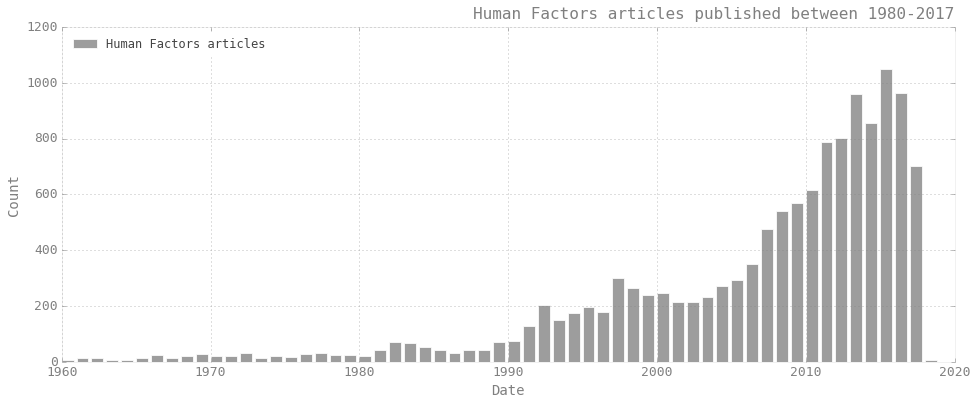

In [60]:
# Draw plot
plt.figure(figsize=(16,6)) # -- Just the total

plt.grid(color="#7f7f7f")
plt.bar(X,Y1,color="#7F7F7F",alpha=.76, label='Human Factors articles')
plt.title('Human Factors articles published between 1980-2017', fontsize=16, fontweight='light', loc="right",verticalalignment="bottom", color="#7f7f7f")
plt.ylabel('Count',fontsize = 14, fontweight='light', color="#7f7f7f")
plt.xlabel('Date',fontsize = 14, fontweight='light', color="#7f7f7f")
legend = plt.legend(loc='upper left')
plt.xlim( 1960, 2020 ) 
plt.tick_params(axis='both', which='major', labelsize=13)
plt.savefig('./images/HumanFactors_bar-total.png', bbox_inches='tight')
plt.show()



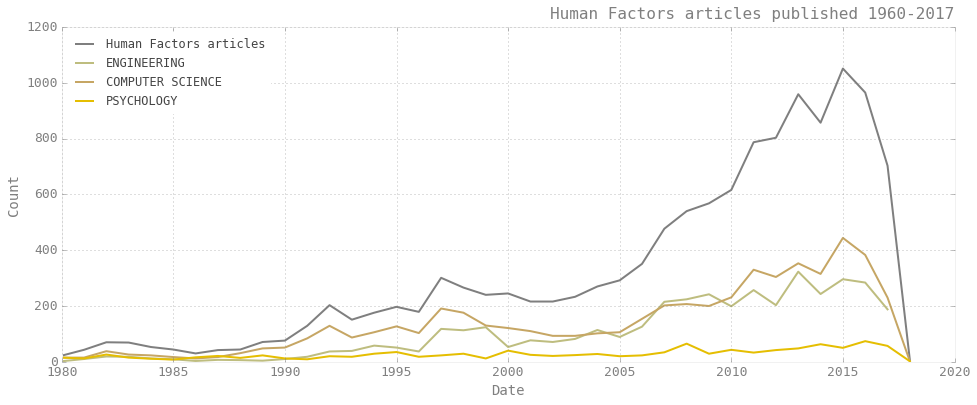

In [62]:
# Draw line chart of above
plt.figure(figsize=(16,6))
plt.grid(color="#7f7f7f")
plt.plot(X,Y1,color='#7f7f7f',alpha=1, label='Human Factors articles')
plt.plot(X2,Y2,color=allhex[0], alpha=1, label=labels[0])
plt.plot(X3,Y3,color=allhex[2], alpha=1, label=labels[1])
plt.plot(X4,Y4,color=allhex[3], alpha=1, label=labels[2])
plt.title('Human Factors articles published 1960-2017', fontsize=16, fontweight='light', loc="right",verticalalignment="bottom", color="#7f7f7f")
plt.ylabel('Count',fontsize = 14, fontweight='light', color="#7f7f7f")
plt.xlabel('Date',fontsize = 14, fontweight='light', color="#7f7f7f")
legend = plt.legend(loc='upper left')
plt.xlim( 1980, 2020 )
plt.tick_params(axis='both', which='major', labelsize=13)
plt.savefig('./images/HumanFactors_line.png', bbox_inches='tight')
plt.show()



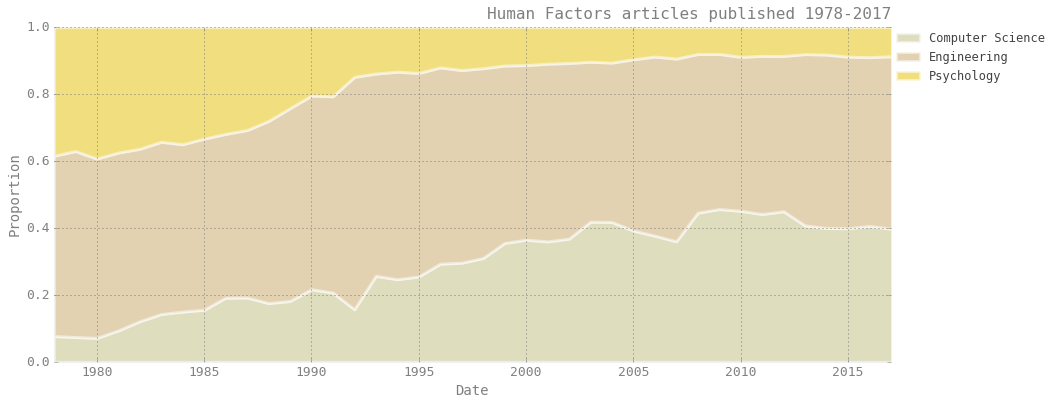

In [61]:
# Stacked area chart - proportion of articles by area
xcat = ["Computer Science", "Engineering", "Psychology"]
plt.figure(figsize=(15,6))
plt.grid(color="#7f7f7f")
plt.title('Human Factors articles published 1978-2017', fontsize=16, fontweight='light', loc="right",verticalalignment="bottom", color="#7f7f7f")
plt.ylabel('Proportion',fontsize = 14, fontweight='light', color="#7f7f7f")
plt.xlabel('Date',fontsize = 14, fontweight='light', color="#7f7f7f")
plt.grid(color="#7f7f7f", linewidth=1)

x=dfg.index
y=[ dfg['p_CS'], dfg['p_Eng'], dfg['p_Psy'] ]
cols = [allhex[0], allhex[2], allhex[3]]
plt.stackplot(x,y, colors=cols, alpha=.5, linewidth=3, labels=xcat[0:3] )
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,frameon=False)
plt.xlim( 1978, 2017 )
plt.tick_params(axis='both', which='major', labelsize=13)

plt.savefig('./images/HumanFactors_stacked.png', bbox_inches='tight') 

plt.show()

